In [1]:
import csv
from functools import reduce
from collections import Counter

CLASSES = "../OpenImage/class-descriptions-boxable.csv"
LABELS = "../OpenImage/test-annotations-bbox.csv"

In [2]:
# MID to Class 
MID2Class = {}
Class_count = {}
with open(CLASSES, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in spamreader:
        MID2Class[row[0]] = row[1]
        Class_count[row[1]] = 0

In [3]:
from pprint import pprint
# pprint(MID2Class)

In [4]:
# Stat MID in Annotations
COUNT = 0
raw_bboxes = []
with open(LABELS, newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
    first = True
    for row in spamreader:
        if first:
            pprint(row)
            first = not first
            continue
        COUNT -= 1
        if COUNT == 0:
            break
        Class_count[MID2Class[row[2]]] += 1
        raw_bboxes.append(row)
-COUNT

['ImageID',
 'Source',
 'LabelName',
 'Confidence',
 'XMin',
 'XMax',
 'YMin',
 'YMax',
 'IsOccluded',
 'IsTruncated',
 'IsGroupOf',
 'IsDepiction',
 'IsInside']


625282

In [5]:
# pprint(Class_count)
sorted_classes = sorted(Class_count.items(), key=lambda x:x[1], reverse=True)
# pprint(sorted_classes)

## Raw Count

In [6]:
print('       name             | count')
print('-'*32)
for c in sorted_classes: 
    print('{c[0]:20}     | {c[1]}'.format(c=c))

       name             | count
--------------------------------
Person                   | 40861
Wheel                    | 34604
Car                      | 28737
Clothing                 | 26531
Human hair               | 26301
Human arm                | 25162
Human head               | 25080
Footwear                 | 21205
Human body               | 20246
Man                      | 17514
Human face               | 15536
Flower                   | 15040
Mammal                   | 13479
Human leg                | 13334
Tire                     | 13177
Human eye                | 13034
Human nose               | 12718
Human hand               | 12505
Sports equipment         | 11992
Plant                    | 11579
Tree                     | 10148
Woman                    | 9047
Auto part                | 8845
Land vehicle             | 8480
Food                     | 8331
Girl                     | 7479
Human mouth              | 7424
Vehicle                  | 7064
Fruit             

/home/ziweihe/anaconda2/envs/py37/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


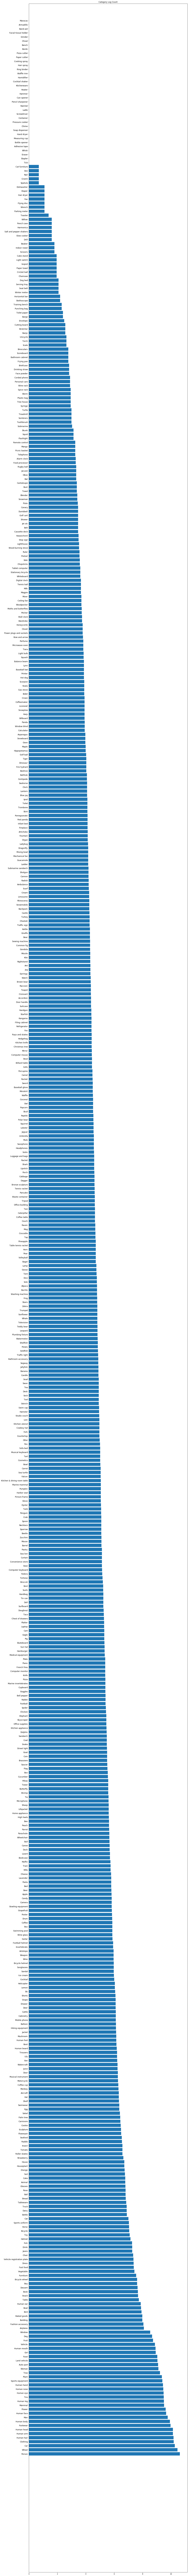

In [22]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(18,300))
plt.title("Category Log Count")
plt.barh(range(len(sorted_classes)), [np.log(x[1]) for x in sorted_classes])
plt.yticks(range(len(sorted_classes)), [x[0] for x in sorted_classes], fontsize="large")

plt.show()

In [8]:
pprint(raw_bboxes[:5])

[['000026e7ee790996',
  'freeform',
  '/m/07j7r',
  '1',
  '0.071905',
  '0.145346',
  '0.206591',
  '0.391306',
  '0',
  '1',
  '1',
  '0',
  '0'],
 ['000026e7ee790996',
  'freeform',
  '/m/07j7r',
  '1',
  '0.439756',
  '0.572466',
  '0.264153',
  '0.435122',
  '0',
  '1',
  '1',
  '0',
  '0'],
 ['000026e7ee790996',
  'freeform',
  '/m/07j7r',
  '1',
  '0.668455',
  '1.000000',
  '0.000000',
  '0.552825',
  '0',
  '1',
  '1',
  '0',
  '0'],
 ['000062a39995e348',
  'freeform',
  '/m/015p6',
  '1',
  '0.205719',
  '0.849912',
  '0.154144',
  '1.000000',
  '0',
  '0',
  '0',
  '0',
  '0'],
 ['000062a39995e348',
  'freeform',
  '/m/05s2s',
  '1',
  '0.137133',
  '0.377634',
  '0.000000',
  '0.884185',
  '1',
  '1',
  '0',
  '0',
  '0']]


In [9]:
img2cats = dict()  # a dict (img_id -> a set of category ids)
_ = [img2cats.setdefault(anno[0], set()).add(anno[2]) for anno in raw_bboxes]
cooc_per_img = [list(v) for v in img2cats.values()]

In [10]:
pprint(cooc_per_img[:5])

[['/m/07j7r'],
 ['/m/015p6', '/m/05s2s'],
 ['/m/0k4j', '/m/07yv9'],
 ['/m/0283dt1',
  '/m/01g317',
  '/m/09j2d',
  '/m/04hgtk',
  '/m/05r655',
  '/m/0dzct',
  '/m/0dzf4',
  '/m/03q69'],
 ['/m/07j7r', '/m/0k0pj', '/m/09j2d', '/m/04hgtk', '/m/0dzct', '/m/0c9ph5']]


In [ ]:
cnts = Counter(reduce(lambda x, y: x+y, cooc_per_img))

In [14]:
cats = [(cat_id, cat_name, cnts[cat_id]) for cat_id,cat_name in list(MID2Class.items())]
cat_id_to_idx = dict([(cat_id, idx) for idx,(cat_id,cat_name) in enumerate(MID2Class.items())])

In [15]:
import pickle
cnt_file = open("openimage_test_cnt.pk", "wb")
pickle.dump(cnts, cnt_file)

In [57]:
cooc_mat = [[0] * len(cats) for _ in range(len(cats))]
for cooc in cooc_per_img:
    for i in range(len(cooc) - 1):
        for j in range(i+1, len(cooc)):
            cooc_mat[cat_id_to_idx[cooc[i]]][cat_id_to_idx[cooc[j]]] += 1
            cooc_mat[cat_id_to_idx[cooc[j]]][cat_id_to_idx[cooc[i]]] += 1

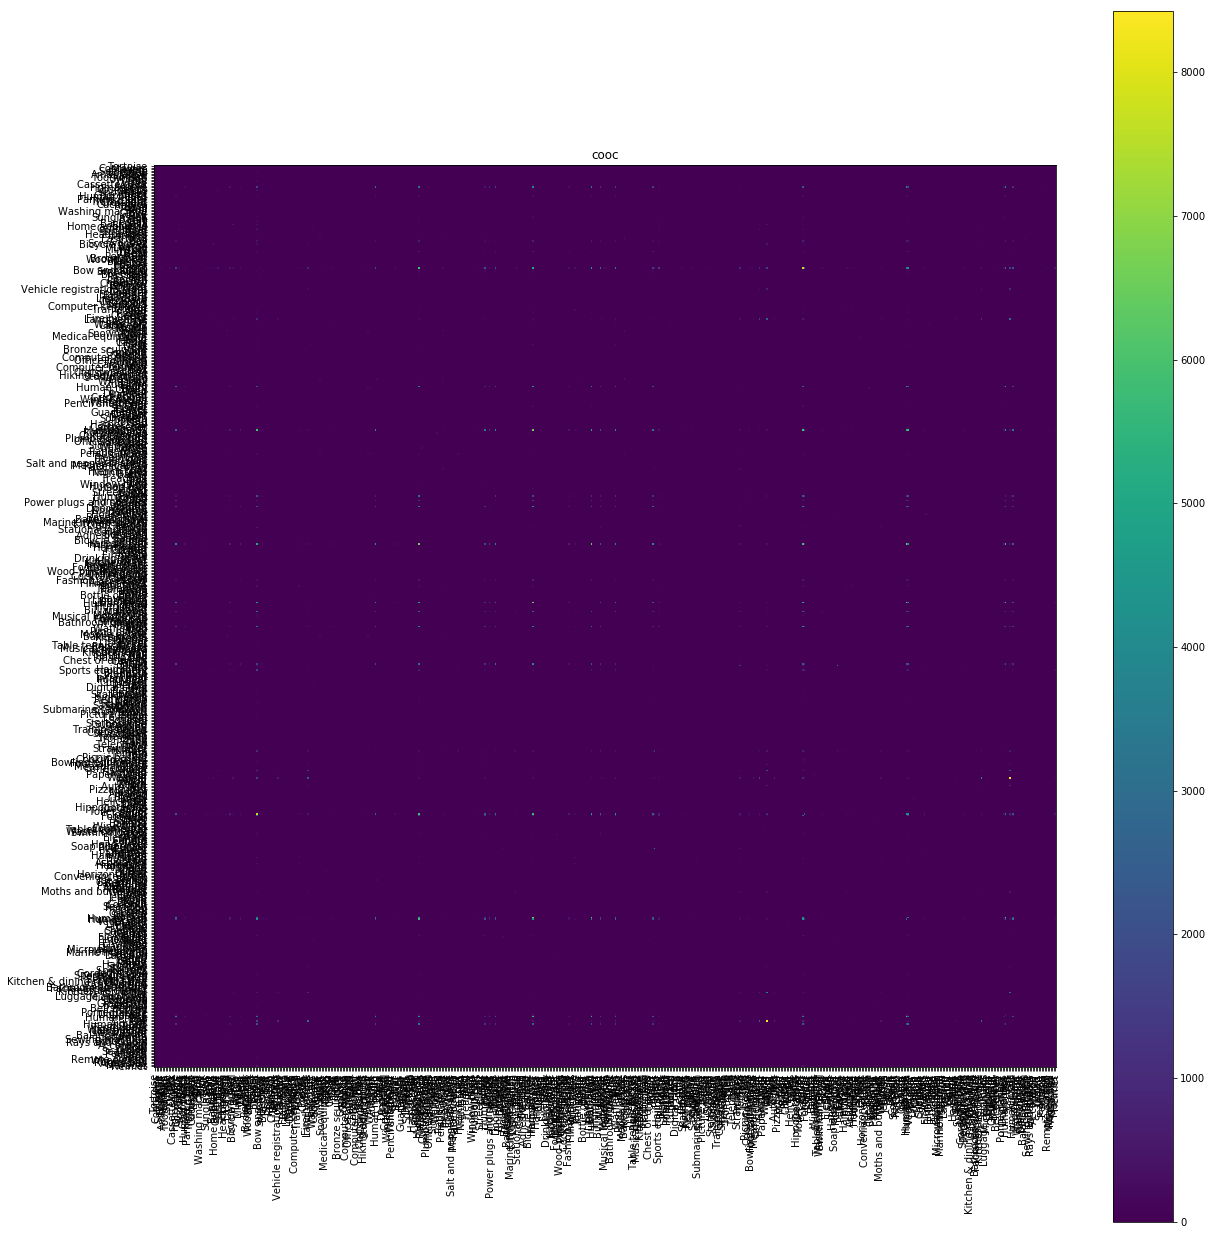

In [58]:
import numpy as np
import matplotlib.pyplot as plt

cooc_mats = np.array(cooc_mat)
plt.figure(figsize=(18,18))
plt.imshow(cooc_mats, cmap=plt.cm.viridis)
plt.colorbar()
plt.title("cooc")
tick_marks = range(len(cats))
plt.xticks(tick_marks, [cat[1] for cat in cats], rotation=90, fontsize='medium')
plt.yticks(tick_marks, [cat[1] for cat in cats], fontsize='medium')
plt.tight_layout()
plt.show()

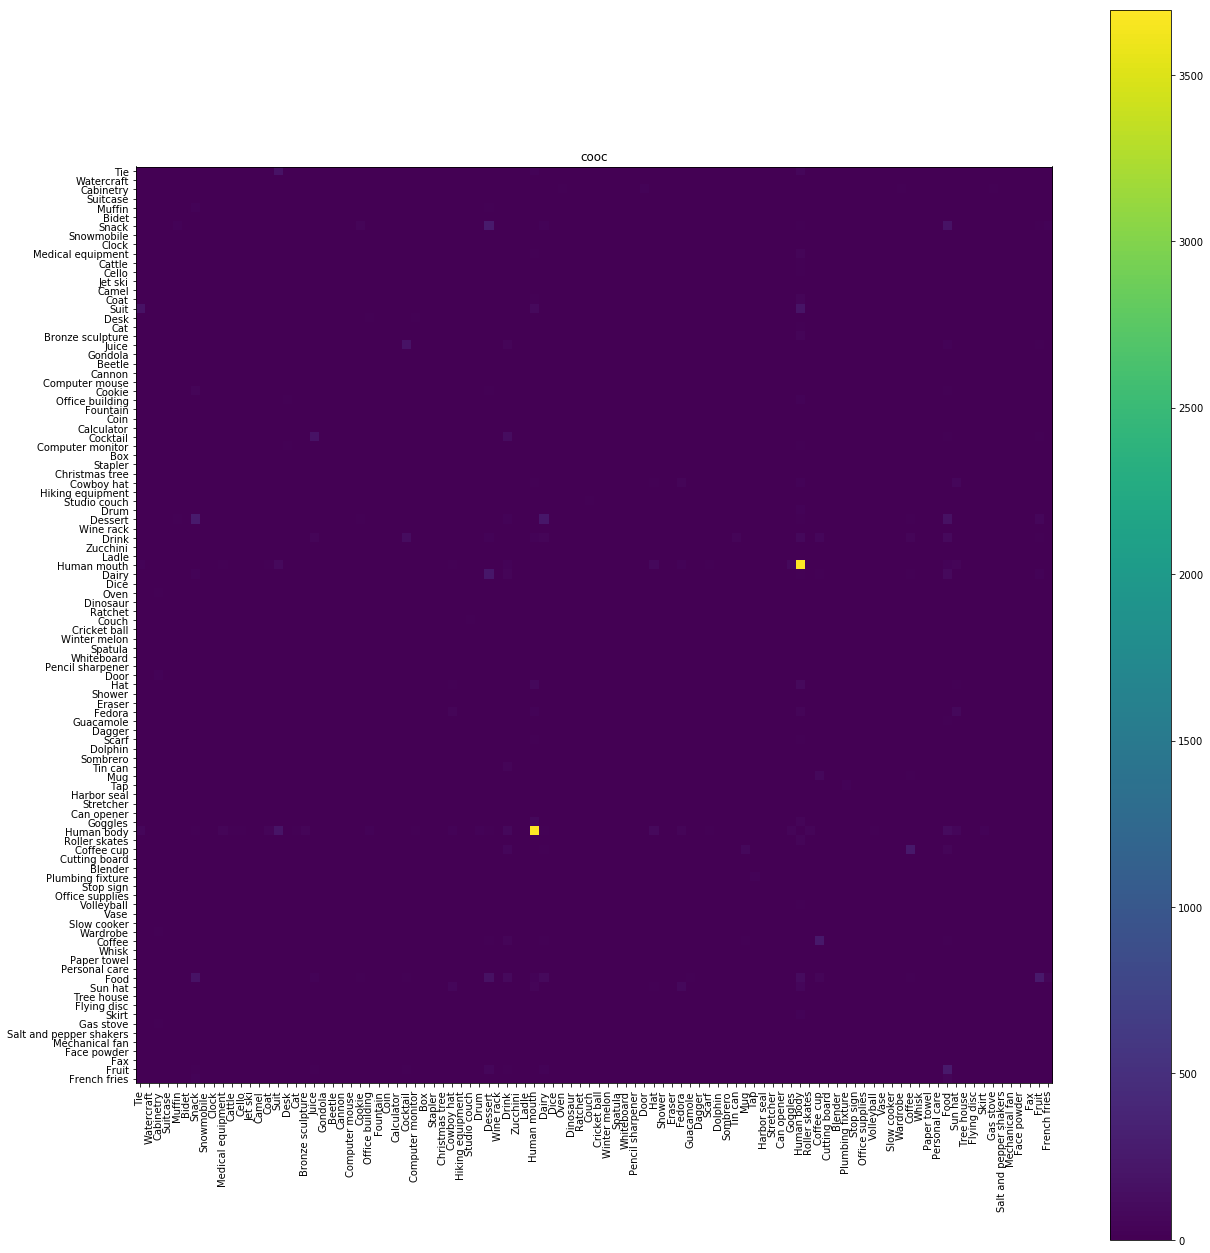

In [65]:
import numpy as np
import matplotlib.pyplot as plt

CAT_START_IDX = 104
SIZE = CAT_START_IDX+ 100

cooc_mats = np.array(cooc_mat)
cooc_mats = cooc_mats[CAT_START_IDX:SIZE,CAT_START_IDX:SIZE]
plt.figure(figsize=(18,18))
plt.imshow(cooc_mats, cmap=plt.cm.viridis)
plt.colorbar()
plt.title("cooc")
tick_marks = range(len(cats[CAT_START_IDX:SIZE]))
plt.xticks(tick_marks, [cat[1] for cat in cats[CAT_START_IDX:SIZE]], rotation=90, fontsize='medium')
plt.yticks(tick_marks, [cat[1] for cat in cats[CAT_START_IDX:SIZE]], fontsize='medium')
plt.tight_layout()
plt.show()

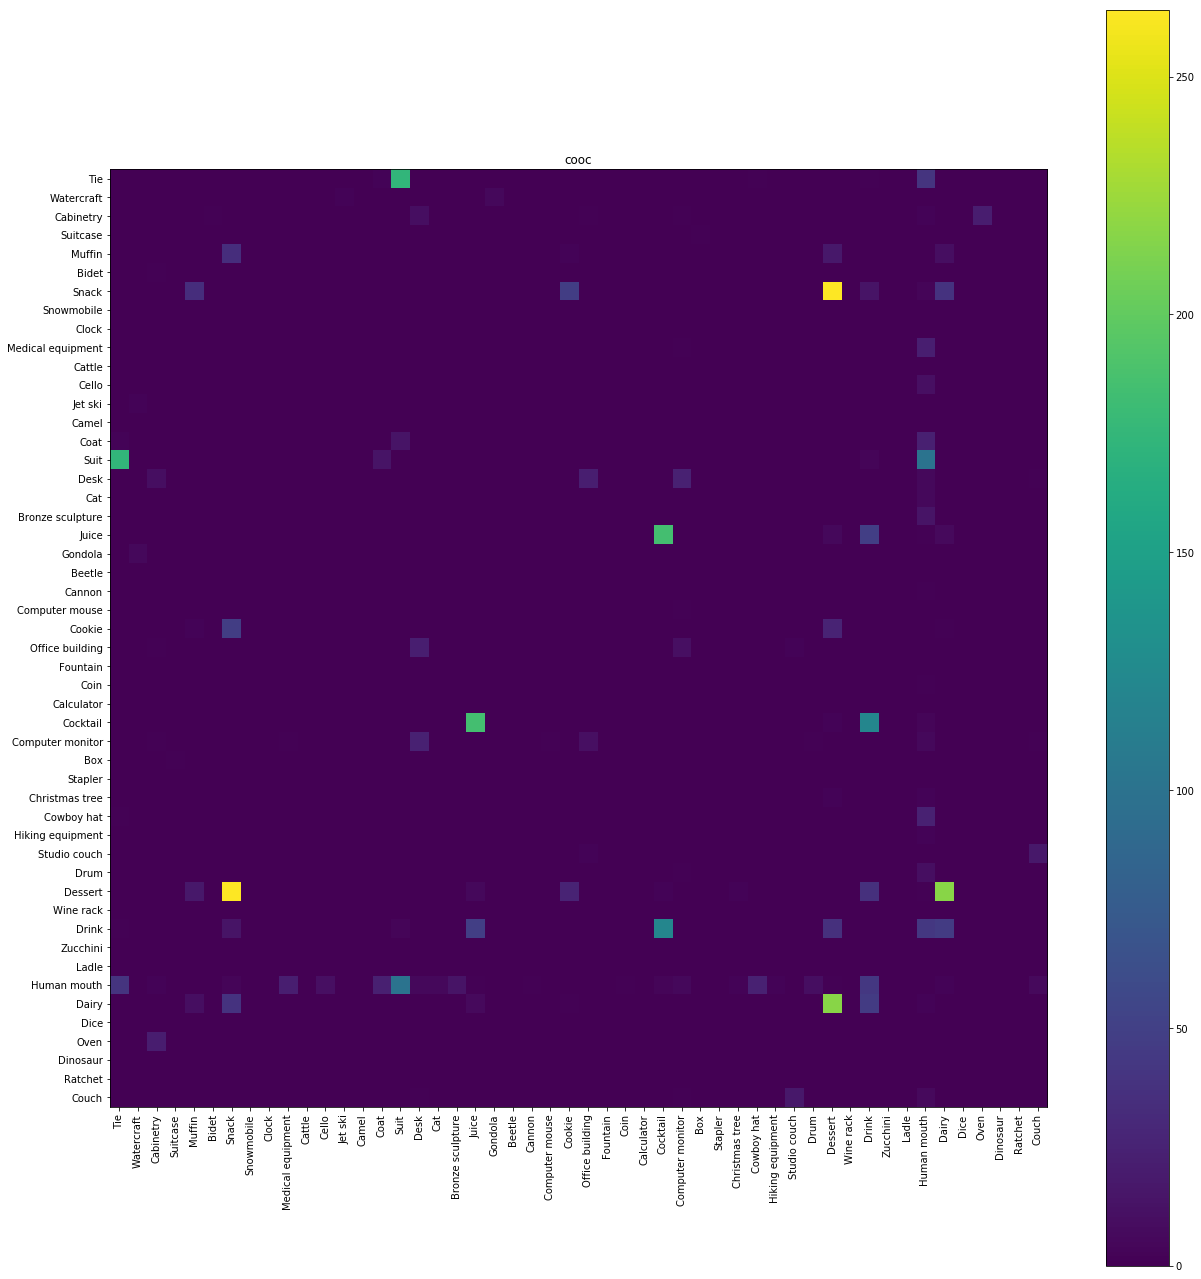

In [66]:
import numpy as np
import matplotlib.pyplot as plt

CAT_START_IDX = 104
SIZE = CAT_START_IDX+ 50

cooc_mats = np.array(cooc_mat)
cooc_mats = cooc_mats[CAT_START_IDX:SIZE,CAT_START_IDX:SIZE]
plt.figure(figsize=(18,18))
plt.imshow(cooc_mats, cmap=plt.cm.viridis)
plt.colorbar()
plt.title("cooc")
tick_marks = range(len(cats[CAT_START_IDX:SIZE]))
plt.xticks(tick_marks, [cat[1] for cat in cats[CAT_START_IDX:SIZE]], rotation=90, fontsize='medium')
plt.yticks(tick_marks, [cat[1] for cat in cats[CAT_START_IDX:SIZE]], fontsize='medium')
plt.tight_layout()
plt.show()

<Figure size 1080x1080 with 0 Axes>

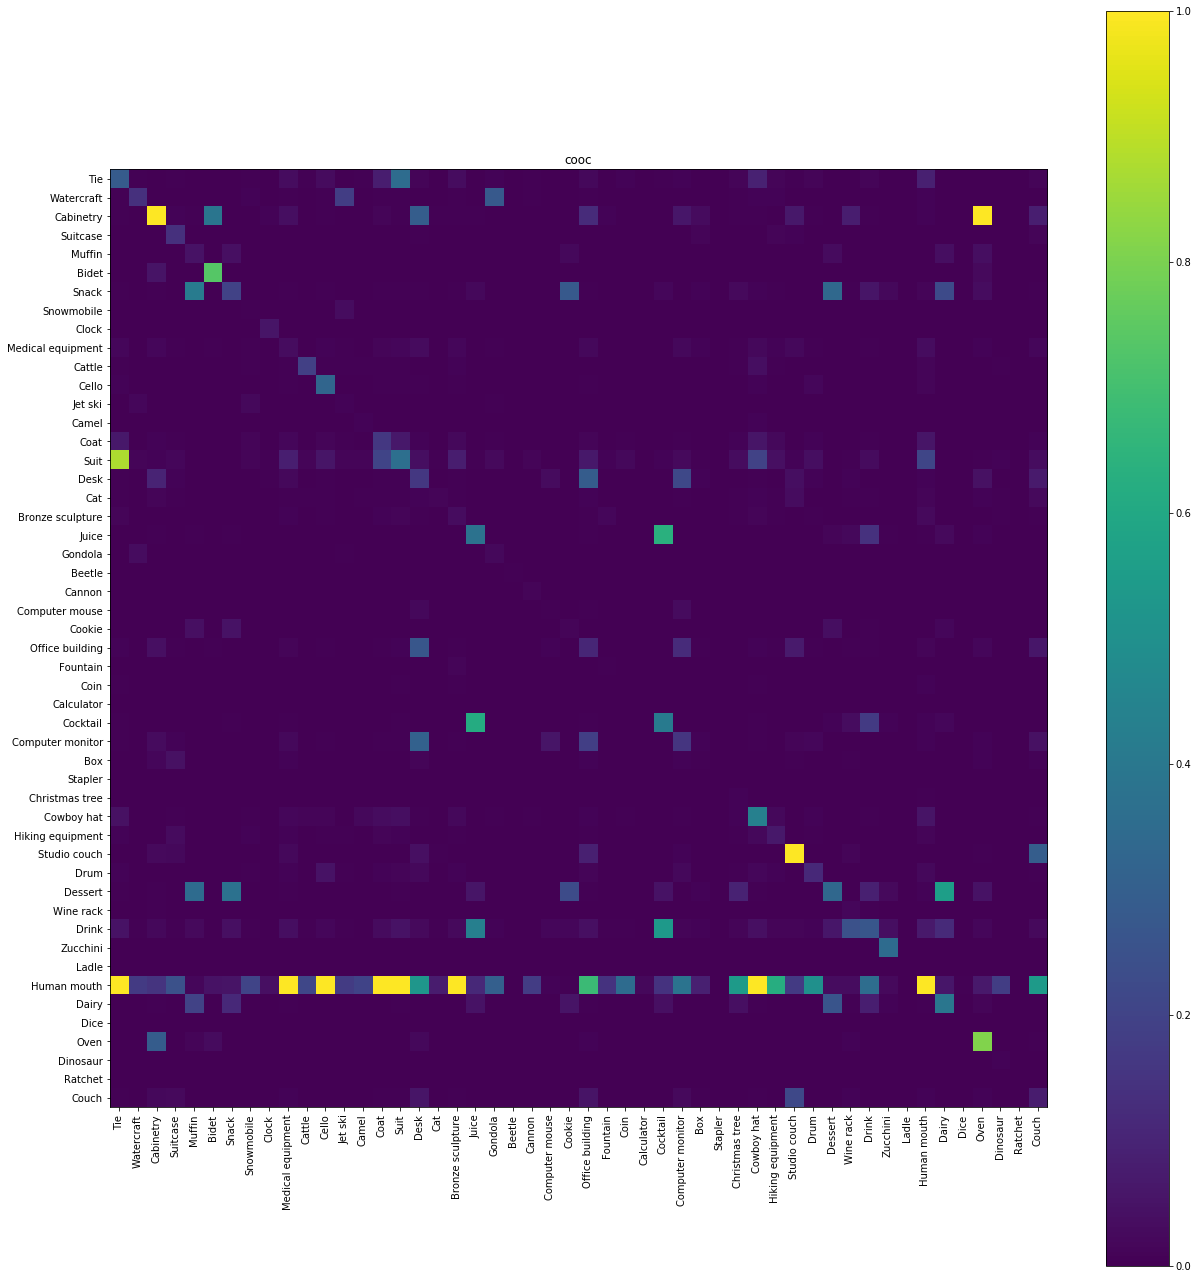

In [68]:
plt.figure(figsize=(15,15))
cond = cooc_mat / np.reshape([c[2]+1 for c in cats], (1, -1))
max_hops = 2
cond_multihop = cond
for h in range(1, max_hops):
    cond_multihop += np.minimum(np.matmul(cond_multihop, cond), 1.0)
    cond_multihop = np.minimum(cond_multihop, 1.0)
# show_cooc_mat(cond_multihop, categories, title='P(y|x) allowing one hop (not formally defined)')

cooc_mats = cond_multihop
cooc_mats = cooc_mats[CAT_START_IDX:SIZE,CAT_START_IDX:SIZE]
plt.figure(figsize=(18,18))
plt.imshow(cooc_mats, cmap=plt.cm.viridis)
plt.colorbar()
plt.title("cooc")
tick_marks = range(len(cats[CAT_START_IDX:SIZE]))
plt.xticks(tick_marks, [cat[1] for cat in cats[CAT_START_IDX:SIZE]], rotation=90, fontsize='medium')
plt.yticks(tick_marks, [cat[1] for cat in cats[CAT_START_IDX:SIZE]], fontsize='medium')
plt.tight_layout()
plt.show()